In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Higgs.tools.ImplementationUtils import (
    implementChainDecayLimit,
    fromHB5Table1,
    readHEPDataCsv
)
from Higgs import bounds as HB
from Higgs import predictions as HP
from Higgs import Predictions
import os, sys
from scipy.interpolate import griddata


sys.path.insert(0, os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
import MassResolutions as resolution

# ATLAS 13TeV LHC

## gg -> H -> a Z -> mumu ll, [2110.13673](https://arxiv.org/abs/2110.13673)


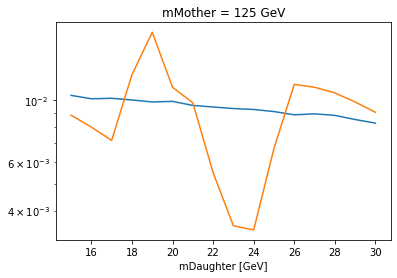

Looks good. Saving this to ggH_LHC13_ATLAS_139.json


In [16]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1954278/%24gg%20%5Cto%20H%5Cto%20Za%20%5Cto%204%5Cmu%24%20limits/1/csv"
)

df = dfs[0].rename(columns={"$m_{a}$ [GeV]": "mDaughter", "Observed": "obs"})
df['exp'] = dfs[1]['Expected (1 sigma errors)']
df['exp'] *= 10e-3
df['obs'] *= 10e-3
df['mMother']=125

limitFile = implementChainDecayLimit(
    1954278,
    {"production": ["ggH"], "chain": "Z", "decay": ["mumu"]},
    "Fig. 17(b)",
    df,
    massResolution={
        "daughter": resolution.mumu["light"],
        "mother": {"absolute": 10, "relative": 0},
    },
    constraints={
        "firstDaughter":[
            {"CPValue":"odd"}
        ],
    },
    idSuffix=2,
)
lim = HB.Limit(limitFile)
